  <div class="alert alert-info">
  Привет, Игорь! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

  <div class="alert alert-success">
  <b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
  </div>
  <div class="alert alert-warning">
  <b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
  </div>
  <div class="alert alert-danger">
  <b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
  </div>
  <div class="alert alert-info">
  <b>👂 Совет:</b> Какие-то дополнительные материалы
  </div>
  Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
  Мне будет легче отследить изменения, если ты выделишь свои комментарии:
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
  Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
   </div>

# Tелеком

# Прогнозирование оттока клиентов для оператора связи «ТелеДом»

## Описание исследования

Оператор связи **«ТелеДом»** сталкивается с проблемой оттока клиентов. Чтобы минимизировать потери, компания хочет внедрить систему прогнозирования оттока на основе данных о клиентах, их тарифах и услугах. В рамках проекта необходимо проанализировать данные, построить и протестировать модель машинного обучения, которая будет предсказывать вероятность ухода клиента.

## Цель исследования

Разработать модель, которая с высокой точностью (ROC-AUC ≥ 0.85) предсказывает вероятность оттока клиентов, чтобы оператор мог своевременно предлагать им специальные условия и удерживать их.

## Задачи исследования

**Загрузка и предварительный анализ данных:**
- Проверить полноту и качество данных (пропуски, аномалии);
- Объединить таблицы в единый датасет;
- Сгенерировать новые признаки (например, длительность контракта).

**Исследовательский анализ данных (EDA):**
- Изучить распределение признаков;
- Визуализировать влияние факторов на отток;
- Провести корреляционный анализ.

**Подготовка данных для обучения:**
- Обработать пропуски и категориальные признаки;
- Разделить данные на обучающую и тестовую выборки *(test_size=0.25)*.

**Обучение и выбор модели:**
- Протестировать алгоритмы:
    - Решающие деревья и случайный лес *(DecisionTreeClassifier, RandomForestClassifier)*;
    - Бустинговые модели *(CatBoost, XGBoost, LightGBM)*;
    - Нейронные сети.
- Подобрать гиперпараметры *(GridSearchCV, RandomizedSearchCV, OptunaSearchCV, Optuna и тд.)*;
- Оценить качество по `ROC-AUC` и accuracy.

**Тестирование и интерпретация модели:**
- Проверить лучшую модель на тестовой выборке;
- Построить матрицу ошибок лучшей модели, кривые `precision-recall`;
- Проанализируйте важность основных входных признаков, влияющих на отток клиентов;
- Для одного из важных входных признаков проведите дополнительное исследование:
    - Показать график зависимости входного и целевого признаков.

**Бизнес-рекомендации:**
- Выделить ключевые факторы оттока;
- Предложить меры для удержания клиентов.

## Описание данных

**Исходные данные содержатся в SQLite-базе и включают четыре таблицы:**
- `contract` — информация о договорах (даты, тип оплаты, платежи);
- `personal` — персональные данные клиентов (пол, возраст, семейное положение);
- `internet` — сведения об интернет-услугах (тип подключения, доп. услуги);
- `phone` — информация о телефонных услугах (многоканальность).

**contract**

| **Наименование признака** | **Описание признака**                    |
|---------------------------|------------------------------------------|
| customerID                | ID абонента                              |
| BeginDate                 | дата начала действия договора            |
| EndDate                   | дата окончания действия договора         |
| Type                      | тип оплаты: раз в год-два или ежемесячно |
| PaperlessBilling          | электронный расчётный лист               |
| PaymentMethod             | тип платежа                              |
| MonthlyCharges            | расходы за месяц                         |
| TotalCharges              | общие расходы абонента                   |

**personal**

| **Наименование признака** | **Описание признака**                 |
|---------------------------|---------------------------------------|
| customerID                | ID пользователя                       |
| gender                    | пол                                   |
| SeniorCitizen             | является ли абонент пенсионером       |
| Partner                   | есть ли у абонента супруг или супруга |
| Dependents                | есть ли у абонента дети               |

**internet**

| **Наименование признака** | **Описание признака**                                       |
|---------------------------|-------------------------------------------------------------|
| customerID                | ID пользователя                                             |
| InternetService           | тип подключения                                             |
| OnlineSecurity            | блокировка опасных сайтов                                   |
| OnlineBackup              | облачное хранилище файлов для резервного копирования данных |
| DeviceProtection          | антивирус                                                   |
| TechSupport               | выделенная линия технической поддержки                      |
| StreamingTV               | стриминговое телевидение                                    |
| StreamingMovies           | каталог фильмов                                             |

**phone**

| **Наименование признака** | **Описание признака**                                 |
|---------------------------|-------------------------------------------------------|
| customerID                | ID пользователя                                       |
| MultipleLines             | подключение телефона к нескольким линиям одновременно |

## Импорт библиотек и вспомогательные фукции

In [1]:
!pip install -Uq phik
!pip install -Uq scikit-learn
!pip install -Uq shap==0.42.0

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Установка модулей ломает окружение и конфликтует между собой</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
Исправил импорты
</div>

In [2]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from phik.report import plot_correlation_matrix
from phik import phik_matrix

from sqlalchemy import create_engine
from sqlalchemy.engine import Engine

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
)
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    recall_score, 
    precision_score,
    roc_curve,
    average_precision_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

<div class="alert alert-success">
<b>👍 Успех:</b> Импортированы нужные библиотеки!
</div>

In [3]:
# загружаем файл с БД, если его не существует
if not os.path.isfile(Path(os.getcwd(), "ds-plus-final.db")):
    !wget https://code.s3.yandex.net/data-scientist/ds-plus-final.db

In [4]:
# определим константы для проекта
DB_DSN: str = "sqlite:///ds-plus-final.db"
RANDOM_STATE: int = 120825
TEST_SIZE: float = 0.25
MAPPING: dict[str, str] = {
    "target_feature": "Целевой признак",
    "contract_duration": "Длительность контракта",
    "customer_id": "ID пользователя",
    "begin_date": "Дата начала действия договора",
    "end_date": "Дата окончания действия договора",
    "payment_type": "Тип оплаты: раз в год-два или ежемесячно",
    "paperless_billing": "Электронный расчётный лист",
    "payment_method": "Тип платежа",
    "monthly_charges": "Расходы за месяц",
    "total_charges": "Общие расходы абонента",
    "gender": "Пол",
    "senior_citizen": "Является ли абонент пенсионером",
    "partner": "Есть ли у абонента супруг или супруга",
    "dependents": "Есть ли у абонента дети",
    "internet_service": "Тип подключения",
    "online_security": "Блокировка опасных сайтов",
    "online_backup": "Облачное хранилище файлов для резервного копирования",
    "device_protection": "Антивирус",
    "tech_support": "Выделенная линия технической поддержки",
    "streaming_tv": " Стриминговое телевидение",
    "streaming_movies": "Каталог фильмов",
    "multiple_lines": "Подключение телефона к нескольким линиям одновременно",
}

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> год заключения контракта не нужен, его нельзя использовать при обчении моделей</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
Убрал год заключения контракта
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [5]:
def show_pie(
    bad_clents_df: pd.DataFrame, 
    good_clents_df: pd.DataFrame, 
    columns: list[str],
):
    """
    Строит круговую диаграмму для 2-х датафреймов:
    :param bad_clents_df: ушедшие клиенты
    :param good_clents_df: оставшиеся клиенты
    :param columns: список признаков для которых строим диаграммы
    :return: None
    """
    
    for col_name in columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

        plt.suptitle(MAPPING[col_name], fontsize=12, y=1.05)
        plt.tight_layout()
    
        data0: pd.Series = bad_clents_df[col_name].value_counts()
        axes[0].pie(data0, autopct='%.2f%%', labels=data0.index)
        axes[0].set_title("Ушедшие клиенты")
        axes[0].set_ylabel("доля")
    
        data1: pd.Series = good_clents_df[col_name].value_counts()
        axes[1].pie(data1, autopct='%.2f%%', labels=data1.index)
        axes[1].set_title("Оставшиеся клиенты")
        axes[1].set_ylabel("Доля")
    
        plt.show()


def title_aligner(title: str, total_length: int = 50) -> str:
    """
    Формирует строку одинаковой длинны типа ==== какие то данные ====
    :param title: строка заголовка
    :param total_length: фиксированная длинна строки
    :return: вернет строку фиксированной длинны с заголовком с середине
    """
    
    equals_needed: int = total_length - len(title) - 4
    left_equals: int = equals_needed // 2
    right_equals: int = equals_needed - left_equals
    return f"\n{'=' * left_equals} {title} {'=' * right_equals}"

## Загрузка и предварительный анализ данных

### Подключение к базе данных

In [6]:
# подключаем БД
engine: Engine = create_engine(DB_DSN, echo=False)

### Первичное исследование таблиц

Прежде чем делать запросы в БД, проверим наличие таблиц.

In [7]:
# проверяем наличие таблиц в БД
stmt: str = "SELECT name FROM sqlite_master WHERE type='table';"
tables_df: pd.DataFrame = pd.read_sql(stmt, engine)
tables_df

,name
0,data_arc
1,data_bulk
2,data_bulk_time
3,data_wire_time
4,contract
5,personal
6,phone
7,internet
8,data_gas
9,data_temp


Все необходимые таблицы на месте. Посмотрим данные из БД для первичного исследования:

In [8]:
for table_name in ["contract", "personal", "phone", "internet"]:
    stmt: str = f"SELECT * FROM {table_name} LIMIT 10"
    total_rows_stmt: str = f"SELECT COUNT(*) AS общее_количество_строк FROM {table_name}"
    print(title_aligner(table_name))
    total_rows_df: pd.DataFrame = pd.read_sql(total_rows_stmt, engine)
    display(total_rows_df.head())
    show_data_df: pd.DataFrame = pd.read_sql(stmt, engine)
    show_data_df.info()
    display(show_data_df.head(10))


=================== contract ===================


,общее_количество_строк
0,7043


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        10 non-null     object
 1   BeginDate         10 non-null     object
 2   EndDate           10 non-null     object
 3   Type              10 non-null     object
 4   PaperlessBilling  10 non-null     object
 5   PaymentMethod     10 non-null     object
 6   MonthlyCharges    10 non-null     object
 7   TotalCharges      10 non-null     object
dtypes: object(8)
memory usage: 768.0+ bytes


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.3,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.1,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.8,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35



=================== personal ===================


,общее_количество_строк
0,7043


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     10 non-null     object
 1   gender         10 non-null     object
 2   SeniorCitizen  10 non-null     object
 3   Partner        10 non-null     object
 4   Dependents     10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes



==================== phone =====================


,общее_количество_строк
0,6361


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerId     10 non-null     object
 1   MultipleLines  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


,CustomerId,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes



=================== internet ===================


,общее_количество_строк
0,5517


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        10 non-null     object
 1   InternetService   10 non-null     object
 2   OnlineSecurity    10 non-null     object
 3   OnlineBackup      10 non-null     object
 4   DeviceProtection  10 non-null     object
 5   TechSupport       10 non-null     object
 6   StreamingTV       10 non-null     object
 7   StreamingMovies   10 non-null     object
dtypes: object(8)
memory usage: 768.0+ bytes


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


**Вывод:** 
- набор полей соответствует заявленному;
- наибольшее количество записей имеет таблица `personal`;
- общий ключ для связи таблиц - `customerID`;
- при выгрузке данных нужно учитывать типы данных.

<div class="alert alert-success">
<b>👍 Успех:</b> Проверены и просмотрены таблицы!
</div>

### Проверим данные на пропуски или аномалии

Посмотрим уникальные значения для входных признаков

In [9]:
exclude_fields: set = {"customerID", "BeginDate", "EndDate"}
for table_name in ["contract", "personal", "phone", "internet"]:
    print(title_aligner(table_name))
    for _, row in pd.read_sql(f"PRAGMA table_info('{table_name}');", engine).iterrows():
        field_name = row["name"]
        if field_name in exclude_fields:
            continue
            
        show_data_df: pd.DataFrame = pd.read_sql(f"SELECT DISTINCT {field_name} FROM {table_name} ORDER BY {field_name}", engine)
        display(show_data_df.head())


=================== contract ===================


,Type
0,Month-to-month
1,One year
2,Two year


,PaperlessBilling
0,No
1,Yes


,PaymentMethod
0,Bank transfer (automatic)
1,Credit card (automatic)
2,Electronic check
3,Mailed check


,MonthlyCharges
0,100.0
1,100.05
2,100.1
3,100.15
4,100.2


,TotalCharges
0,
1,100.17
2,100.19
3,100.2
4,100.24



=================== personal ===================


,gender
0,Female
1,Male


,SeniorCitizen
0,0
1,1


,Partner
0,No
1,Yes


,Dependents
0,No
1,Yes



==================== phone =====================


,CustomerId
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ


,MultipleLines
0,No
1,Yes



=================== internet ===================


,InternetService
0,DSL
1,Fiber optic


,OnlineSecurity
0,No
1,Yes


,OnlineBackup
0,No
1,Yes


,DeviceProtection
0,No
1,Yes


,TechSupport
0,No
1,Yes


,StreamingTV
0,No
1,Yes


,StreamingMovies
0,No
1,Yes


**Вывод:**
- В результате анализа была обнаружено, что признак `TotalCharges` имеет записи с пустым значением. Что после объединения таблиц нужно обработать.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Объединение данных и создание новых признаков

- Ключевой таблицей для объединения будет `personal`;
- Названия полей приведем к одному стилю `snake_case`;
- Добавим целевой признак:
    - `target_feature` - целевой признак (ушел клиент или нет) принимает значения 0 или 1. Считаем, что если дата окончания контракта не пустая, клиент ушел;
- Добавим новый входной признак `contract_duration` - длительность контракта;
- Для признака `InternetService` пустое значение заменяем на `Without service` (клиент не пользуется услугой);
- Переименуем признак `Type` в `payment_type`, чтобы было с ним удобно работать (в *python* и не только, *type* является ключевым словом);
- Для признака `TotalCharges` пустое поле заменим на `NULL` для дальнейшей обработки.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Значение No используется если не подключена конкретная услуга, но подключен интерент или телефон. Заполнение всех пропусков этим значением не даст различий между этими данными.
    
Текущий день нельзя использовать для расчета длительности контракта</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 

- в запросе учел замечание и разделил услуги на две группы (интернет услуги и телефонные услуги). С этим учетом заполнял пропуски;
- создал новый входной признак `contract_duration` (длительность контракта).
    
</div>

In [10]:
stmt: str = """
SELECT 
    CASE 
        WHEN EndDate != 'No' 
        THEN 1 ELSE 0 
    END AS target_feature, -- определяем целевой признак
    CASE 
        WHEN EndDate = 'No'
        THEN julianday('2020-02-01') - julianday(BeginDate)
        ELSE julianday(EndDate) - julianday(BeginDate)
    END AS contract_duration, -- длительность контракта
    per.customerID AS customer_id,
    BeginDate AS begin_date,
    EndDate AS end_date,
    Type AS payment_type,
    CASE 
        WHEN PaperlessBilling IS NULL 
        THEN 'No' ELSE PaperlessBilling 
    END AS paperless_billing,
    PaymentMethod AS payment_method,
    MonthlyCharges AS monthly_charges,
    CASE 
        WHEN TotalCharges = ' ' 
        THEN NULL ELSE TotalCharges 
    END AS total_charges,
    gender AS gender,
    CASE 
        WHEN SeniorCitizen = 0 
        THEN 'No' ELSE 'Yes' 
    END AS senior_citizen,
    CASE 
        WHEN Partner IS NULL
        THEN 'No' ELSE Partner
    END AS partner,
    CASE 
        WHEN Dependents IS NULL
        THEN 'No' ELSE Dependents
    END AS dependents,
    
    -- Интернет-услуги
    CASE 
        WHEN InternetService IS NULL 
        THEN 'Without service' 
        ELSE InternetService 
    END AS internet_service,
    CASE 
        WHEN InternetService IS NULL 
        THEN 'Without service' 
        WHEN OnlineSecurity IS NULL
        THEN 'No' ELSE OnlineSecurity
    END AS online_security,
    CASE 
        WHEN InternetService IS NULL 
        THEN 'Without service' 
        WHEN OnlineBackup IS NULL 
        THEN 'No' ELSE OnlineBackup
    END AS online_backup,
    CASE 
        WHEN InternetService IS NULL 
        THEN 'Without service' 
        WHEN DeviceProtection IS NULL
        THEN 'No' ELSE DeviceProtection
    END AS device_protection,
    CASE 
        WHEN InternetService IS NULL 
        THEN 'Without service' 
        WHEN TechSupport IS NULL
        THEN 'No' ELSE TechSupport
    END AS tech_support,
    CASE 
        WHEN InternetService IS NULL 
        THEN 'Without service' 
        WHEN StreamingTV IS NULL
        THEN 'No' ELSE StreamingTV
    END AS streaming_tv,
    CASE 
        WHEN InternetService IS NULL 
        THEN 'Without service' 
        WHEN StreamingMovies IS NULL
        THEN 'No' ELSE StreamingMovies
    END AS streaming_movies,
    
    -- Телефонные услуги
    CASE 
        WHEN p.CustomerId IS NULL
        THEN 'Without service'
        WHEN MultipleLines IS NULL
        THEN 'No' ELSE MultipleLines
    END AS multiple_lines
FROM personal per
LEFT JOIN contract c ON c.customerID = per.customerID
LEFT JOIN internet i ON i.customerID = per.customerID 
LEFT JOIN phone p ON p.CustomerId = per.customerID 
"""

source_df: pd.DataFrame = pd.read_sql(stmt, engine)
source_df: pd.DataFrame = source_df.astype({
    "target_feature": "int8",
    "contract_duration": "int32",
    "customer_id": "string",
    "begin_date": "string",
    "end_date": "string",
    "payment_type": "string",
    "paperless_billing": "string",
    "payment_method": "string",
    "monthly_charges": "float",
    "total_charges": "float",
    "gender": "string",
    "senior_citizen": "string",
    "partner": "string",
    "dependents": "string",
    "internet_service": "string",
    "online_security": "string",
    "online_backup": "string",
    "device_protection": "string",
    "tech_support": "string",
    "streaming_tv": "string",
    "streaming_movies": "string",
    "multiple_lines": "string",
})
source_df.info()
source_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target_feature     7043 non-null   int8   
 1   contract_duration  7043 non-null   int32  
 2   customer_id        7043 non-null   string 
 3   begin_date         7043 non-null   string 
 4   end_date           7043 non-null   string 
 5   payment_type       7043 non-null   string 
 6   paperless_billing  7043 non-null   string 
 7   payment_method     7043 non-null   string 
 8   monthly_charges    7043 non-null   float64
 9   total_charges      7032 non-null   float64
 10  gender             7043 non-null   string 
 11  senior_citizen     7043 non-null   string 
 12  partner            7043 non-null   string 
 13  dependents         7043 non-null   string 
 14  internet_service   7043 non-null   string 
 15  online_security    7043 non-null   string 
 16  online_backup      7043 

,target_feature,contract_duration,customer_id,begin_date,end_date,payment_type,paperless_billing,payment_method,monthly_charges,total_charges,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,0,31,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,...,Yes,No,DSL,No,Yes,No,No,No,No,Without service
1,0,1036,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,0,123,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,0,1371,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,...,No,No,DSL,Yes,No,Yes,Yes,No,No,Without service
4,0,153,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,...,No,No,Fiber optic,No,No,No,No,No,No,No


Изучим пропуски в признаке `total_charges`. Предположим, что поле можно заполнить средним значеним записей, которые совпадают по общим признакам с искомыми.

In [11]:
with pd.option_context('display.max_columns', None):
    display(source_df[source_df["total_charges"].isna()])

,target_feature,contract_duration,customer_id,begin_date,end_date,payment_type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
488,0,0,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Without service
753,0,0,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,Male,No,No,Yes,Without service,Without service,Without service,Without service,Without service,Without service,Without service,No
936,0,0,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,Female,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,0,0,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,Male,No,Yes,Yes,Without service,Without service,Without service,Without service,Without service,Without service,Without service,Yes
1340,0,0,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,Female,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Without service
3331,0,0,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,Male,No,Yes,Yes,Without service,Without service,Without service,Without service,Without service,Without service,Without service,No
3826,0,0,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,Male,No,Yes,Yes,Without service,Without service,Without service,Without service,Without service,Without service,Without service,Yes
4380,0,0,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,Female,No,Yes,Yes,Without service,Without service,Without service,Without service,Without service,Without service,Without service,No
5218,0,0,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,Male,No,Yes,Yes,Without service,Without service,Without service,Without service,Without service,Without service,Without service,No
6670,0,0,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,Female,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


В результате обнаружили 11 записей. Признаки с совпадающими значениями:
- `begin_date` - 2020-02-01;
- `target_feature` - 0;
- `senior_citizen` - 0;
- `dependents` - 1.

Попробуем найти записи содержащие эти значения в признаках.

In [12]:
source_df[
    (~source_df["total_charges"].isna())
    & (source_df["begin_date"] == "2020-02-01")
    & (source_df["target_feature"] == 0)
    & (source_df["senior_citizen"] == 0)
    & (source_df["dependents"] == 1)
].shape

(0, 22)

Совпадений не обнаружено. Количество записей 11 из 7043, что составляет меньше процента от общего количества. Такие записи можно исключить из датасета.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Это новые абоненты, заключившие договор в день среза данных
</div>

In [13]:
# исключим строки с пустыми значениями в признаке total_charges
source_df: pd.DataFrame = source_df[~source_df["total_charges"].isna()]
source_df.shape

(7032, 22)

**Вывод:**
- Данные были объеденины в один датафрейм по ключу `customerID`;
- Добавлен целевой признак `target_feature`;
- Удалены записи с аномальными значениями в признаке `total_charges`;
- Переименованы признаки (приведины к виду *snake_case*).

### Предобработка данных

#### Обработка дубликатов

Проверим данные на наличие дубликатов для поля `customer_id`.

In [14]:
source_df.duplicated(subset="customer_id").sum()

0

Дубликаты отсутствуют, сделаем признак `customer_id` индексом датафрейма. Так как он является ключевым полем для данных.

In [15]:
source_df: pd.DataFrame = source_df.set_index("customer_id")
source_df.head()

,target_feature,contract_duration,begin_date,end_date,payment_type,paperless_billing,payment_method,monthly_charges,total_charges,gender,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,31,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,Without service
5575-GNVDE,0,1036,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,0,123,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,0,1371,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,Without service
9237-HQITU,0,153,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


После обновления индекса, попробуем найти дубликаты в данных.

In [16]:
source_df.duplicated().sum()

4

Обнаружено дубликаты, избавимся от них.

In [17]:
source_df = source_df.drop_duplicates()
source_df.shape

(7028, 21)

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Обработка пропусков

In [18]:
source_df.isna().sum()

target_feature       0
contract_duration    0
begin_date           0
end_date             0
payment_type         0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

Избавимся от признаков которые не будут участвовать в обучении модели и еще раз проверим данные на дубликаты.

In [19]:
source_df: pd.DataFrame = source_df.drop(["begin_date", "end_date"], axis=1)
source_df.duplicated().sum()

0

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Нужно создать новые признаки до исключения дат</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    
Перед удалением признаков `begin_date` и `end_date` были созданы следующие признаки:
- `target_feature` (целевой признак);
- `contract_duration` (длительность контракта).

</div>

**Вывод:**
- Удалены дубликаты из данных;
- Проверены данные на наличие пропусков;
- Удалили из данные признаки `begin_date` и `end_date`

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Исследовательский анализ данных (EDA)

### Визуализация и распределение признаков

Определим входные признаки по категориям:
- количественные неприрывные;
- категориальные.

In [20]:
# количественные неприрывные
num_columns = [
    "monthly_charges", 
    "total_charges", 
    "contract_duration",
]

# категориальные
ohe_columns = [
    "payment_type", 
    "payment_method", 
    "gender", 
    "internet_service",
    "paperless_billing", 
    "senior_citizen", 
    "partner", 
    "dependents", 
    "online_security", 
    "online_backup",
    "device_protection",
    "tech_support",
    "streaming_tv",
    "streaming_movies",
    "multiple_lines",
]

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> В ord_columns у тебя категориальные признаки, а не количественные</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    
`ord_columns` удалил, перенес признаки в категориальные.

</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Разделим данные на две категории:
- Ушедшие клиенты
- Оставшиеся клиенты
Чтобы данные в сравнении выглядели нагляднее

In [21]:
bad_clents_df: pd.DataFrame = source_df[source_df["target_feature"] == 1]
good_clents_df: pd.DataFrame = source_df[source_df["target_feature"] == 0]

Изучим количественные неприрывные признаки:

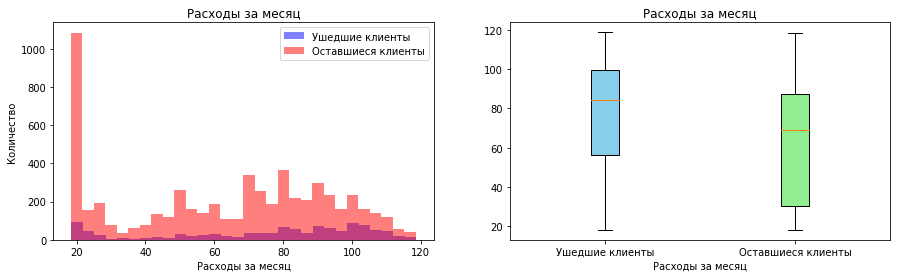


=============================== Ушедшие клиенты (Расходы за месяц) ===============================


count    1101.000000
mean       75.546004
std        29.116213
min        18.400000
25%        56.150000
50%        84.200000
75%        99.500000
max       118.750000
Name: monthly_charges, dtype: float64


============================= Оставшиеся клиенты (Расходы за месяц) ==============================


count    5927.000000
mean       62.815151
std        29.830236
min        18.250000
25%        30.200000
50%        69.250000
75%        87.325000
max       118.600000
Name: monthly_charges, dtype: float64

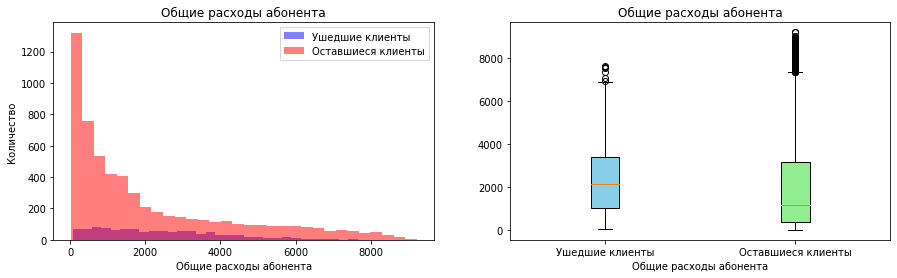


============================ Ушедшие клиенты (Общие расходы абонента) ============================


count    1101.000000
mean     2371.377275
std      1581.862275
min        77.840000
25%      1048.050000
50%      2139.030000
75%      3404.910000
max      7649.760000
Name: total_charges, dtype: float64


========================== Оставшиеся клиенты (Общие расходы абонента) ===========================


count    5927.000000
mean     2071.398999
std      2193.086743
min        19.050000
25%       377.000000
50%      1194.280000
75%      3176.000000
max      9221.380000
Name: total_charges, dtype: float64

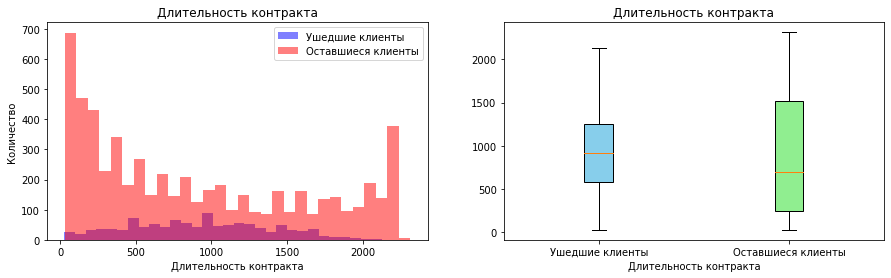


============================ Ушедшие клиенты (Длительность контракта) ============================


count    1101.000000
mean      924.863760
std       458.771309
min        28.000000
25%       577.000000
50%       915.000000
75%      1249.000000
max      2129.000000
Name: contract_duration, dtype: float64


========================== Оставшиеся клиенты (Длительность контракта) ===========================


count    5927.000000
mean      895.193015
std       716.258826
min        31.000000
25%       245.000000
50%       702.000000
75%      1523.000000
max      2314.000000
Name: contract_duration, dtype: float64

In [22]:
for col_name in num_columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    
    axes[0].hist(
        bad_clents_df[col_name], 
        bins=30, 
        alpha=0.5, 
        label="Ушедшие клиенты", 
        color="blue",
    )
    axes[0].hist(
        good_clents_df[col_name], 
        bins=30, 
        alpha=0.5, 
        label="Оставшиеся клиенты", 
        color="red",
    )
    axes[0].set_title(MAPPING[col_name])
    axes[0].set_xlabel(MAPPING[col_name])
    axes[0].set_ylabel("Количество")
    axes[0].legend(loc="upper right")

    axes[1].boxplot(
        bad_clents_df[col_name], 
        positions=[1], 
        patch_artist=True,
        boxprops=dict(facecolor="skyblue"),
    )
    axes[1].boxplot(
        good_clents_df[col_name], 
        positions=[2],
        patch_artist=True,
        boxprops=dict(facecolor="lightgreen"),
    )
    axes[1].set_xticks([1, 2])
    axes[1].set_xticklabels(["Ушедшие клиенты", "Оставшиеся клиенты"])
    axes[1].set_title(MAPPING[col_name])
    axes[1].set_xlabel(MAPPING[col_name])
    
    plt.show()

    print(title_aligner(f"Ушедшие клиенты ({MAPPING[col_name]})", 100))
    display(source_df[source_df["target_feature"] == 1][col_name].describe())
    print(title_aligner(f"Оставшиеся клиенты ({MAPPING[col_name]})", 100))
    display(source_df[source_df["target_feature"] == 0][col_name].describe())

**Месячные расходы:**
- Ушедшие клиенты платят в среднем больше (75.55), чем оставшиеся (62.82). Разница значима (по средним и медианам);
- Разброс значений (стандартное отклонение) примерно одинаков (~29), но у оставшихся клиентов он чуть выше;
- Медиана (50%) у ушедших клиентов значительно выше (84.20 против 69.25), что говорит о смещении распределения в сторону более дорогих тарифов;
- Минимальные и максимальные значения близки, но у оставшихся клиентов есть более дешёвые тарифы (18.25 vs 18.40).

**Общие расходы:**
- Среднее значение общих расходов у ушедших клиентов выше (2371.38 против 2071.40), но разница менее выражена, чем в месячных расходах;
- Медиана у ушедших клиентов почти в 2 раза выше (2139.03 vs 1194.28), что указывает на существенную разницу в "жизненном цикле" клиентов;
- Стандартное отклонение у оставшихся клиентов выше (2193.09 против 1581.86), что объясняется наличием как новых клиентов, так и давно существующих;
- 75-й перцентиль у ушедших клиентов выше (3404.91 vs 3176.00), что подтверждает, что среди них больше "долгожителей".

**Длительность контракта:**
- Для «Ушедших клиентов» длительность контрактов варьируется от 28 до 2129 дней. Среднее значение составляет около 925 дней, а медиана — 915 дней;
- Для «Оставшихся клиентов» длительность контрактов варьируется от 31 до 2314 дней. Среднее значение — около 895 дней, а медиана — 702 дня;
- У «Ушедших клиентов» наблюдается более высокая концентрация контрактов с длительностью около 1000 дней, что видно по пику на графике;
- У «Оставшихся клиентов» распределение более равномерное, с меньшим количеством контрактов в диапазоне 1000–1500 дней.

**Вывод:**
- Ушедшие клиенты в среднем "дороже" для компании (больше платили за всё время);
- Возможно, среди них больше долгосрочных клиентов, которые решили уйти из-за накопленного недовольства или изменения условий;
- Оставшиеся клиенты включают как новых, так и лояльных, что увеличивает разброс;
- Клиенты, которые остались, имеют более разнообразное распределение длительности контрактов, что может указывать на их удовлетворенность условиями;
- Клиенты, которые ушли, чаще имели контракты с более высокой средней длительностью, что может быть связано с определенными факторами, влияющими на их решение.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Изучим категориальные признаки:

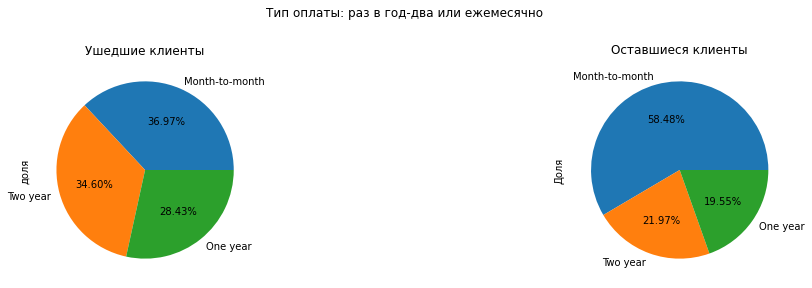

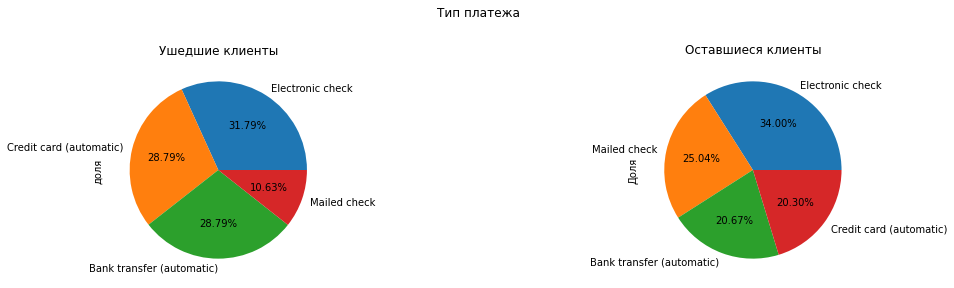

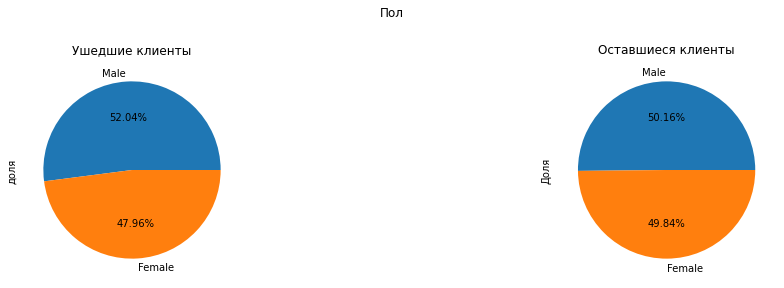

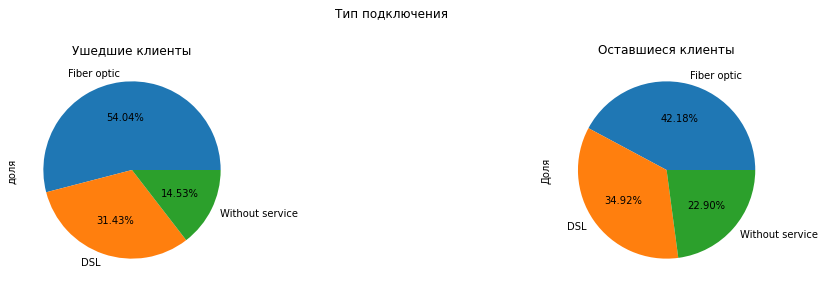

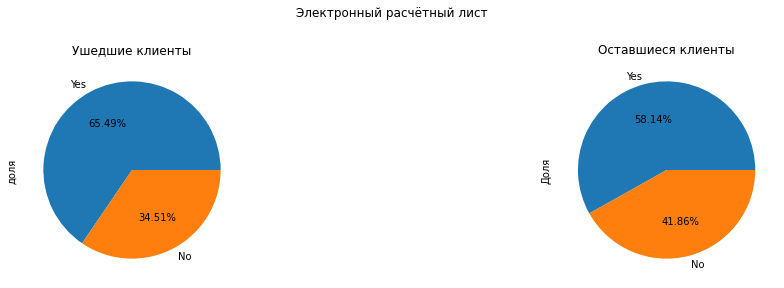

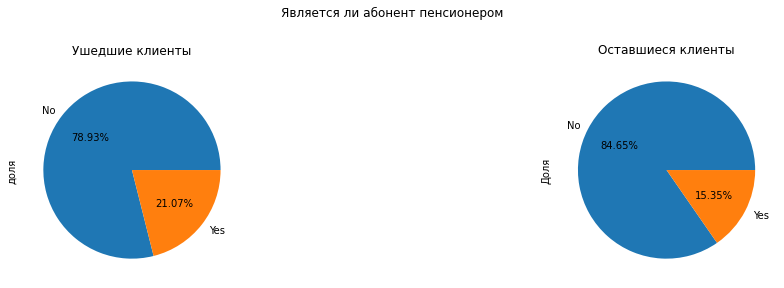

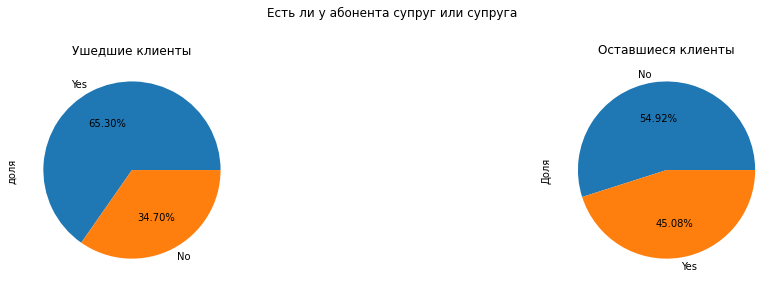

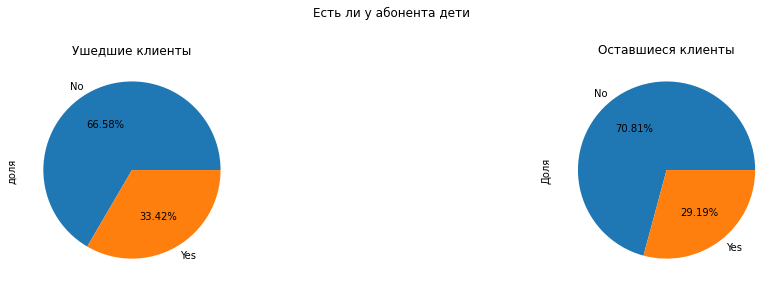

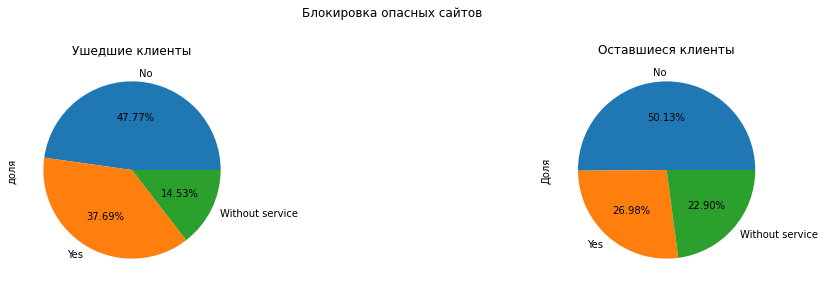

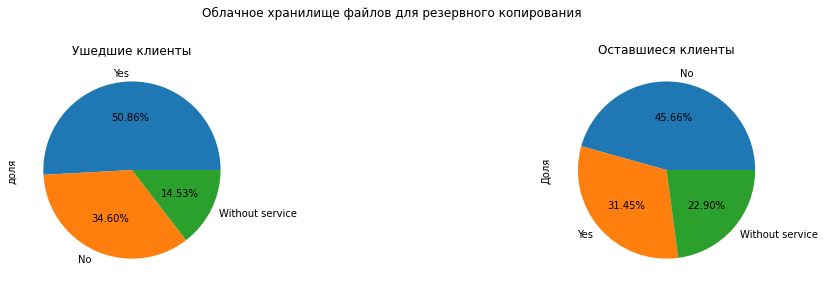

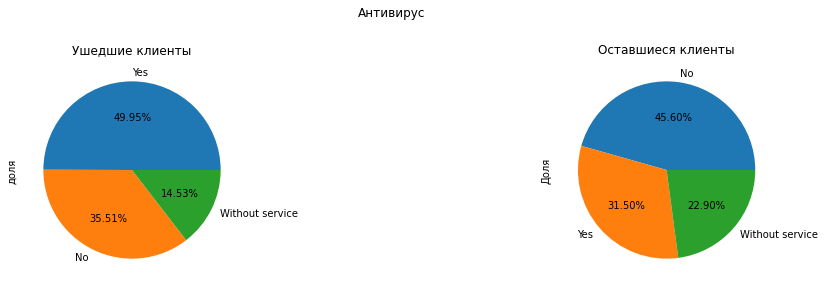

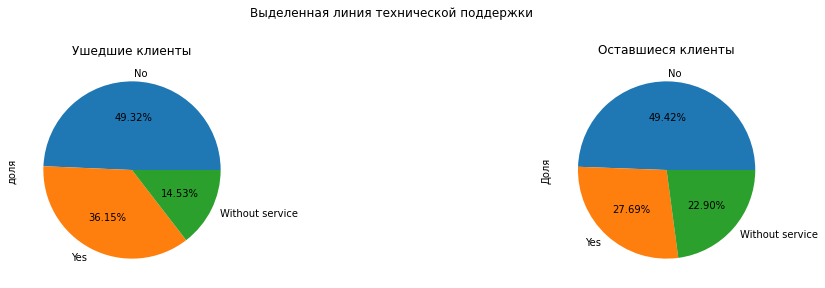

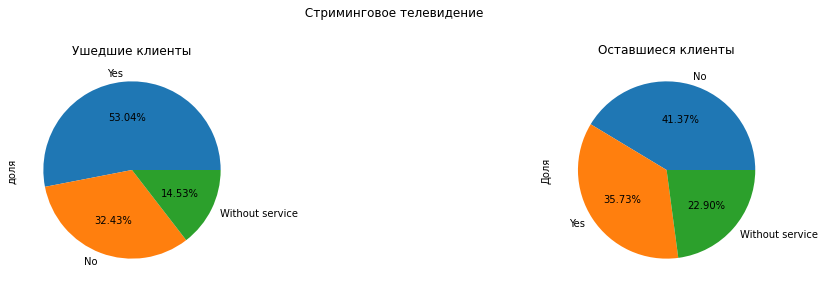

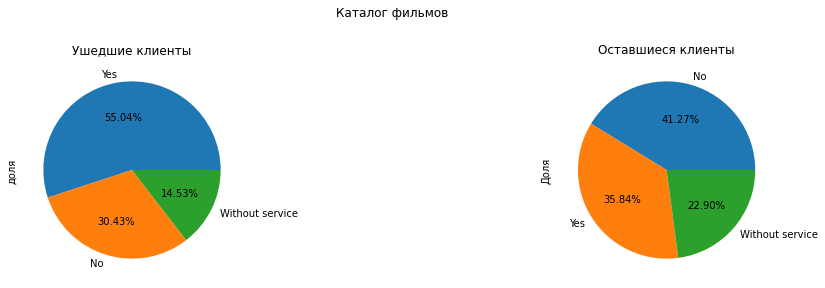

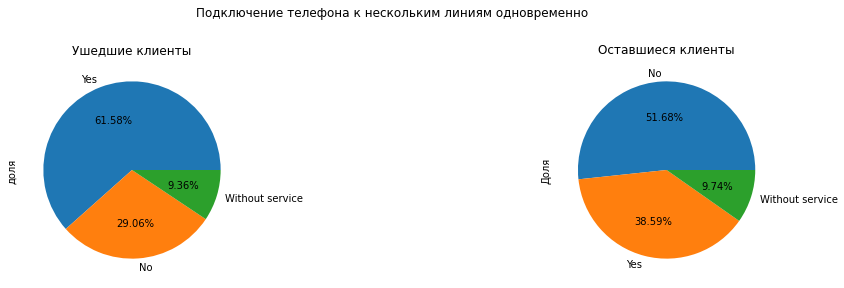

In [23]:
show_pie(bad_clents_df, good_clents_df, ohe_columns)

Между клиентами по отраженным на графиках показателям нет сильной разницы, можно выделить сдедующие признаки:
- Облачное хранилище файлов для резервного копирования:
    - ушедшие - Yes=`50.86`, No=`49.14`;
    - оставшиеся - Yes=`31.45`, No=`68.55`.
- Антивирус:
    - ушедшие - Yes=`49.95`, No=`50.05`;
    - оставшиеся - Yes=`31.50`, No=`68.50`.
- Стриминговое телевидение:
    - ушедшие - Yes=`53.04`, No=`46.96`;
    - оставшиеся - Yes=`35.73`, No=`64.27`.
- Каталог фильмов:
    - ушедшие - Yes=`55.04`, No=`44.96`;
    - оставшиеся - Yes=`35.84`, No=`64.16`.

**Вывод:**
- большая часть оставшихся клиентов платит ежемесячно, среди ушедших клиентов тип оплаты распределен равномерно;
- по `типу платежа`, `полу` и `типу подключения` большой разницы нет.

Дополнительные сервисы не помогают удержанию, а наоборот — связаны с оттоком. Это тревожный сигнал: либо клиенты не видят в них ценности, либо сервисы работают плохо.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Корреляционный анализ

Коэффициент корреляции Пирсона/Спирмена обычно используется для непрерывных данных, в то время как $\phi$-коэффициент применяется для номинальных или категориальных переменных, поэтому будем использовать **$\phi$-коэффициент** корреляции.

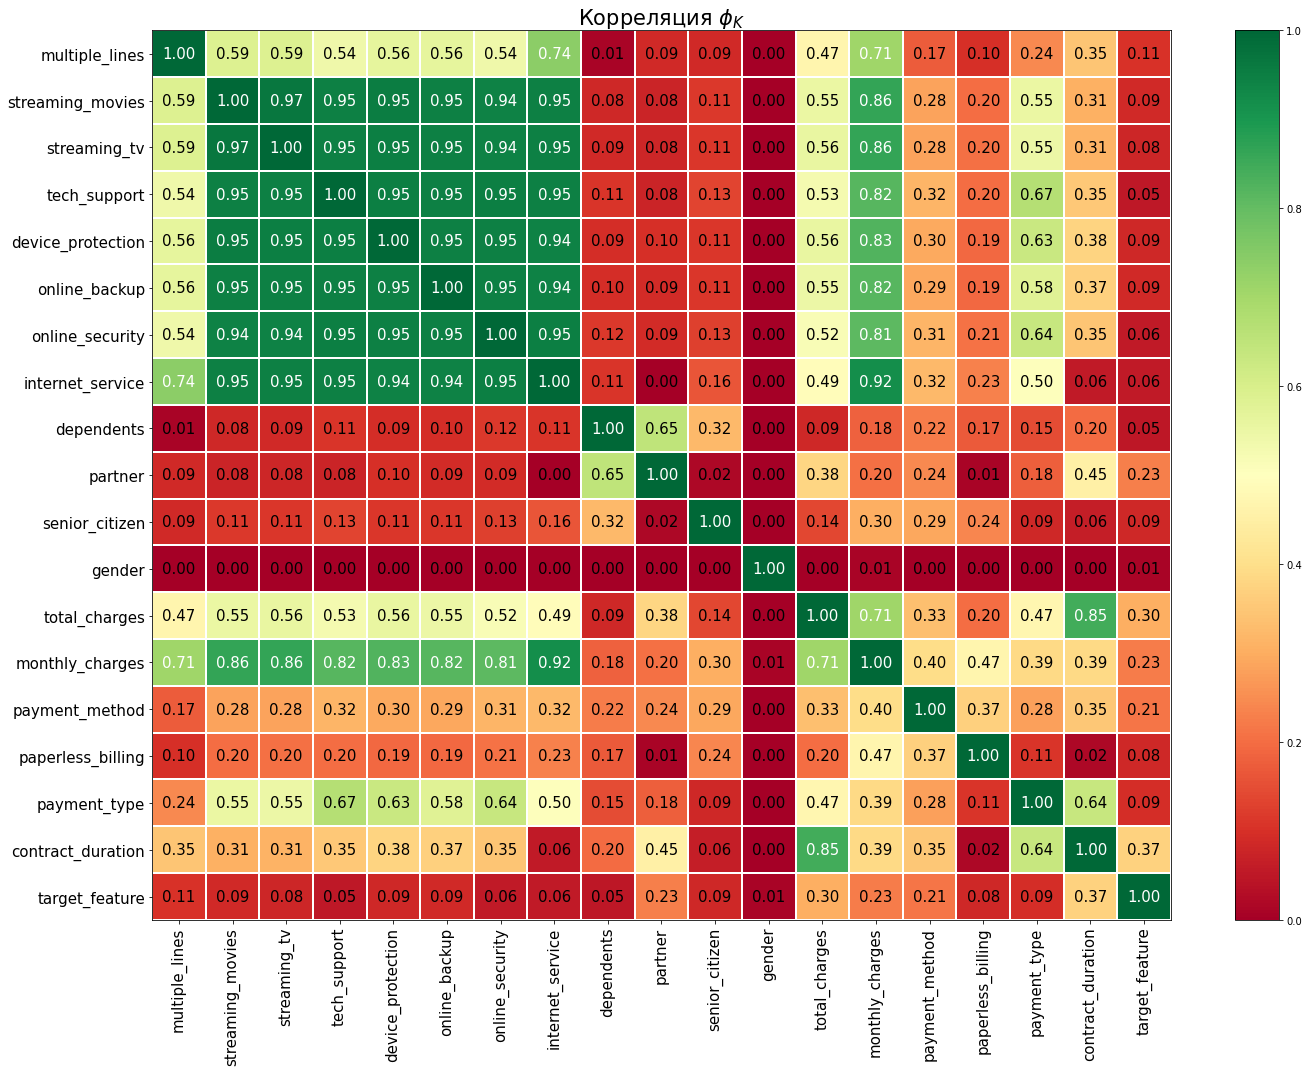

In [24]:
phik_overview = phik_matrix(
    source_df, 
    interval_cols=num_columns,
)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, 
    vmax=1, 
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15),
) 

Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от **0.9** до **0.95** по модулю. В данном случае мы имеем высокую корреляцию входных признаков между:
- `internet_service` (Тип подключения) и `monthly_charges` (Расходы за месяц) - **0.92**;
- взаимная мультиколлинеарность присутствует у следующих признаков:
    - `streaming_movies` (Каталог фильмов);
    - `streaming_tv`(Стриминговое телевидение);
    - `tech_support` (Выделенная линия технической поддержки);
    - `device_protection` (Антивирус);
    - `online_security` (Блокировка опасных сайтов); 
    - `online_backup` (Облачное хранилище файлов для резервного копирования).

In [25]:
# избавимся от признаков которые могут вызвать переобучение модели
source_df: pd.DataFrame = source_df.drop([
    "streaming_movies",
    "streaming_tv",
    "tech_support",
    "device_protection",
    "online_security", 
    "online_backup",
    "internet_service",
], axis=1)


In [26]:
# удалим признаки из списка признаков для обучения
for column in [
    "streaming_movies",
    "streaming_tv",
    "tech_support",
    "device_protection",
    "online_security", 
    "online_backup",
    "internet_service",
]:
    ohe_columns.remove(column)

Посмотрим еще раз на матрицу корреляции, после удаления мультиколлинеарных признаков 

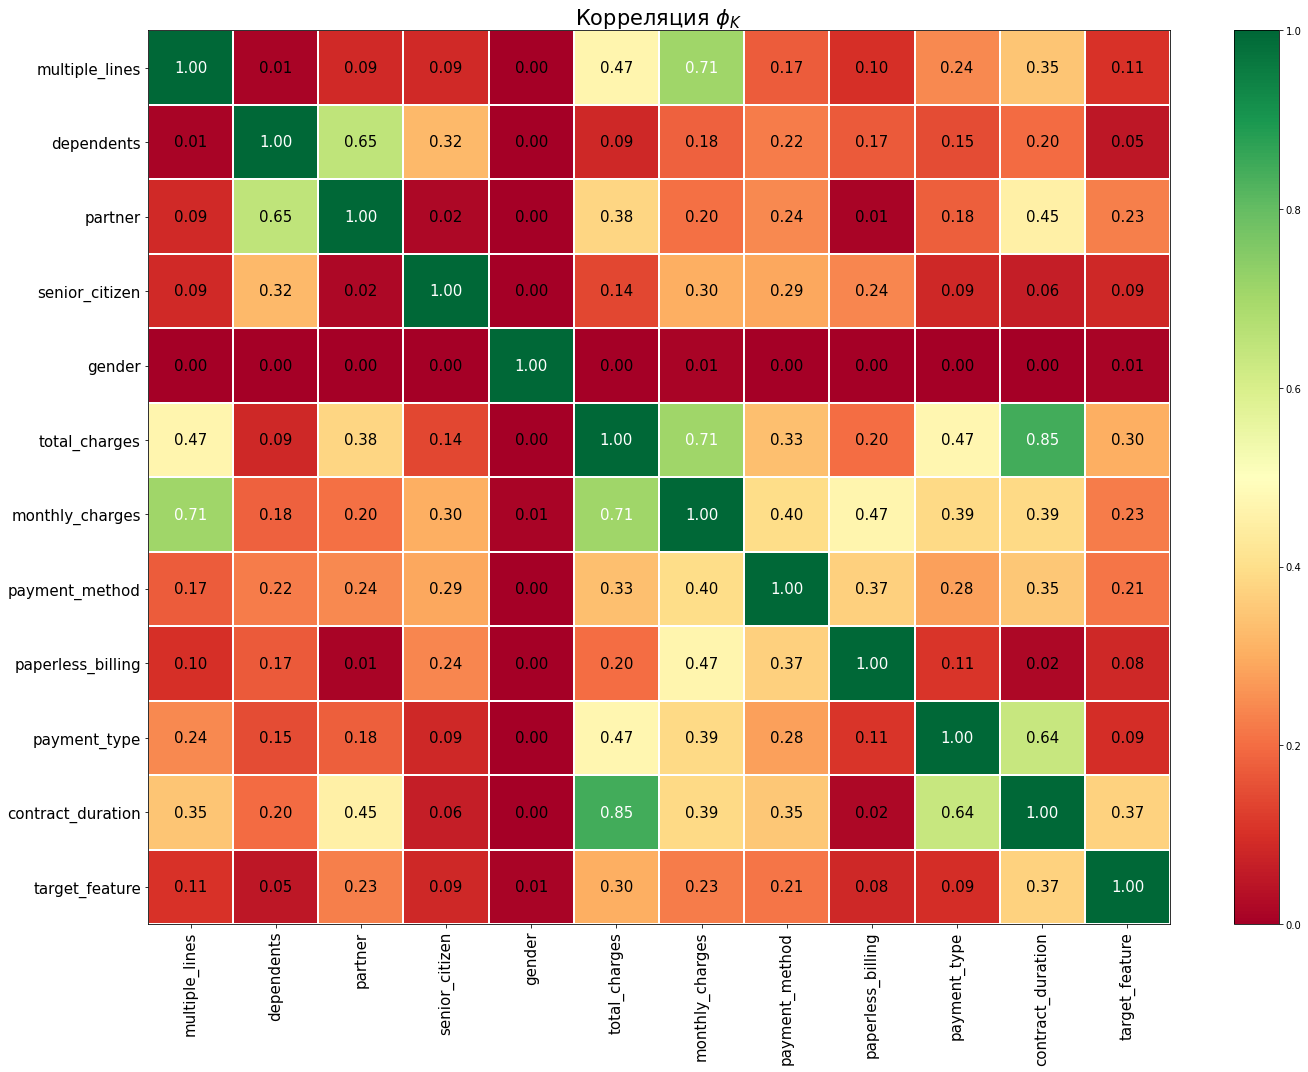

In [27]:
phik_overview = phik_matrix(
    source_df, 
    interval_cols=num_columns,
)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, 
    vmax=1, 
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15),
) 

**Вывод:**
- Удалили мультиколлинеарные признаки:
    - `internet_service` (Тип подключения);
    - `streaming_movies` (Каталог фильмов);
    - `streaming_tv`(Стриминговое телевидение);
    - `tech_support` (Выделенная линия технической поддержки);
    - `device_protection` (Антивирус);
    - `online_security` (Блокировка опасных сайтов); 
    - `online_backup` (Облачное хранилище файлов для резервного копирования).
- Самая высоокая корреляция целевого признака (target_reature) с признаком `contract_duration`.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> start_year не нужен, его нельзя использовать
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    
`start_year` удалил

</div>

## Подготовка данных для обучения

In [28]:
# Разделим данные на тренировочную и тестовую выборки
X = source_df.drop("target_feature", axis=1)
y = source_df["target_feature"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y,
)

In [29]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline([
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)),
])

# создаём общий пайплайн для подготовки данных
preprocessor = ColumnTransformer(
    [
        ("ohe", ohe_pipe, ohe_columns),
        ("num", MinMaxScaler(), num_columns),
    ], 
    remainder="passthrough",
    verbose_feature_names_out=False,
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ("preprocessor", preprocessor),
    ("models", LogisticRegression(random_state=RANDOM_STATE)),
])

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Для чего здесь SimpleImputer и какие пропуски в каких признаках допустимо заполнять по такой логике?</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 

Пропусков в данных нет, нам действительно не нужен `SimpleImputer`. Убрал.
    
</div>

## Обучение и выбор модели

### Обучение класических моделей 

In [30]:
param_grid = [
    {
        "models": [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        "models__max_depth": range(2, 11),
        "models__max_features": range(2, 11),
        "models__min_samples_leaf": range(1, 11),
        "models__min_samples_split": range(2, 11),
        "preprocessor__num": [StandardScaler(), MinMaxScaler(), "passthrough"], 
    },
    {
        "models": [RandomForestClassifier(random_state=RANDOM_STATE)],
        "models__max_depth": range(2, 11),
        "models__max_features": range(2, 11),
        "models__min_samples_leaf": range(1, 11),
        "models__min_samples_split": range(2, 11),
        "models__n_estimators": range(50, 100),
        "preprocessor__num": [StandardScaler(), MinMaxScaler(), "passthrough"]  
    },
    {
        "models": [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver="liblinear", 
            penalty="l1",
        )],
        "models__C": range(1, 6),
        "preprocessor__num": [StandardScaler(), MinMaxScaler(), "passthrough"],  
    },
    # Использование бустинговой модели LGBMClassifier
    {
        "models": [LGBMClassifier(
            random_state=RANDOM_STATE, 
            metric="roc_auc", 
            boosting_type="gbdt",
            force_row_wise=True,
            feature_name="auto",
            verbose=-1,
        )],
        "models__num_leaves": range(20, 100),
        "models__learning_rate": np.arange(0.01, 0.3, 0.01),
        "models__n_estimators": range(50, 300),
        "models__min_child_samples": range(50, 100),
        "preprocessor__num": [StandardScaler(), MinMaxScaler(), "passthrough"],  
    }
]

In [31]:
searcher = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring="roc_auc",
    random_state=RANDOM_STATE,
    n_jobs=2,
)
searcher.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: feature_name keyword has been found in `params` and will be ignored.
Please use feature_name argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning: feature_name keyword has been found in `params` and will be ignored.
Please use feature_name argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ig

[LightGBM] [Warning] Unknown parameter: feature_name


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['payment_type',
                                                                                'payment_method',
                                                                                'gender',
                                                                                'paperless_billing',
                                                                                'senior_citizen',
                                                                                'partner',
                                                                                'dependents',
                                                                                'multiple_lines']),
                                                                              ('...
                                         'models__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]),
                                         'models__min_child_samples': range(50, 100),
                                         'models__n_estimators': range(50, 300),
                                         'models__num_leaves': range(20, 100),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=120825, scoring='roc_auc')

In [32]:
best_model = searcher.best_estimator_["models"]
preprocessor = searcher.best_estimator_["preprocessor"]

### Нейронная сеть

In [33]:
# Препроцессинг
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [34]:
nn_model = Sequential([
    Input(shape=(X_train_encoded.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),\
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])
nn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "AUC"],
)

2025-08-18 11:42:47.636894: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
early_stop = EarlyStopping(monitor="val_loss", patience=5)
history = nn_model.fit(
    X_train_encoded,
    y_train,
    validation_data=(X_test_encoded, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
165/165 [==============================] - 2s 7ms/step - loss: 56.6262 - accuracy: 0.7291 - auc: 0.5041 - val_loss: 9.2973 - val_accuracy: 0.8435 - val_auc: 0.4524
Epoch 2/100
165/165 [==============================] - 1s 5ms/step - loss: 13.0300 - accuracy: 0.7240 - auc: 0.4489 - val_loss: 0.7092 - val_accuracy: 0.6352 - val_auc: 0.6203
Epoch 3/100
165/165 [==============================] - 1s 5ms/step - loss: 3.0553 - accuracy: 0.7877 - auc: 0.4899 - val_loss: 0.6085 - val_accuracy: 0.8435 - val_auc: 0.5935
Epoch 4/100
165/165 [==============================] - 1s 6ms/step - loss: 1.1730 - accuracy: 0.8287 - auc: 0.5009 - val_loss: 0.5101 - val_accuracy: 0.8435 - val_auc: 0.4214
Epoch 5/100
165/165 [==============================] - 1s 4ms/step - loss: 1.0222 - accuracy: 0.8302 - auc: 0.4884 - val_loss: 0.4944 - val_accuracy: 0.8435 - val_auc: 0.4176
Epoch 6/100
165/165 [==============================] - 1s 5ms/step - loss: 0.7201 - accuracy: 0.8370 - auc: 0.4876 - val_lo

In [36]:
y_train_pred_proba = nn_model.predict(X_train_encoded).ravel()
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

### Оценка качества моделей

In [37]:
# посмотрим метрики на тестовых данных
X_train_encoded = preprocessor.transform(X_train)

print("Метрика ROC-AUC лучшей модели (LGBMClassifier) на кросс-валидации:", searcher.best_score_)
print("Метрика Accuracy лучшей модели (LGBMClassifier) на кросс-валидации:", accuracy_score(best_model.predict(X_train_encoded), y_train))
print("Метрика ROC-AUC на тренировочной выборке для нейронной сети:", roc_auc_score(y_train, y_train_pred))
print("Метрика Accuracy на тренировочной выборке для нейронной сети:", accuracy_score(y_train_pred, y_train))

Метрика ROC-AUC лучшей модели (LGBMClassifier) на кросс-валидации: 0.8851010053097141
Метрика Accuracy лучшей модели (LGBMClassifier) на кросс-валидации: 0.9903244166192373
Метрика ROC-AUC на тренировочной выборке для нейронной сети: 0.5
Метрика Accuracy на тренировочной выборке для нейронной сети: 0.8432934926958832


'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


**Вывод:**
- На тренеровочной выборке лучшей модель является `LGBMClassifier` с метрикой `ROC-AUC` ~ 0.89

<div class="alert alert-success">
<b>👍 Успех:</b> Лучшая модель найдена!
</div>

## Тестирование и интерпретация модели

### Оценка на тестовой выборке

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Здесь нужно использовать predict_proba</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 

Использовал `predict_proba` для расчета метрики на тестовой выборке
    
</div>

In [38]:
# посмотрим метрики на тестовых данных
y_test_pred = searcher.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred > 0.5).astype(int)

recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test_pred, y_test)
roc_auc = roc_auc_score(y_test_pred, y_test)

print("Recall:", round(recall, 3))
print("Precision:", round(precision, 3))
print("Accuracy:", round(accuracy, 3))
print("ROC-AUC:", round(roc_auc, 3))


print("\nОтчет о классификации:")
print(classification_report(y_test, y_test_pred))

Recall: 0.524
Precision: 0.823
Accuracy: 0.908
ROC-AUC: 0.87

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1482
           1       0.82      0.52      0.64       275

    accuracy                           0.91      1757
   macro avg       0.87      0.75      0.79      1757
weighted avg       0.90      0.91      0.90      1757



'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


- **Recall** - показывает, какую долю объектов положительного класса модель корректно идентифицировала. `Recall` особенно важен в задачах, где пропуск положительных примеров имеет серьёзные последствия;
- **Precision** - это метрика, которая показывает, какая доля объектов, предсказанных моделью как положительные, действительно является положительными. `Precision` используется для оценки качества классификации, особенно в задачах, где важно минимизировать количество ложноположительных прогнозов;
- **Accuracy** - показывает долю правильно предсказанных объектов (как положительных, так и отрицательных) от общего числа объектов.
- **ROC-AUC** - это одна из ключевых метрик для оценки качества бинарной классификации. Она измеряет способность модели разделять два класса (например, положительный и отрицательный) на всех возможных порогах классификации.

Более комплексной оценки рекомендуется использовать `ROC-AUC`.

- `Recall` (полнота) = 0.524
    - Это означает, что модель правильно идентифицирует 52.4% всех реально уходящих клиентов;
    - Около 47.6% уходящих клиентов модель пропускает (ложноотрицательные случаи).
- `Precision` (точность) = 0.823
    - Из всех клиентов, которых модель пометила как уходящих, 82.3% действительно уходят;
    - Только 17.7% являются ложными срабатываниями (клиенты, которые не уйдут, но получат предложение).
- `Accuracy` (точность) = 0.908
    - Модель правильно предсказывает 90.8% всех случаев (как уход, так и сохранение клиентов).
- `ROC-AUC` = 0.87
    - Отличное значение, показывает высокую способность модели разделять классы.

**Для класса 0 (не уходящие):**
- Precision (0.92): Из всех предсказанных "0" 92% верны;
- Recall (0.98): Модель корректно идентифицирует 98% истинных "0". Отлично справляется с "отрицательным" классом, но возможен перекос в его сторону.

**Для класса 1 (уходящие):**
- Precision (0.82): Из всех предсказанных "1" 82% верны — это хорошо;
- Recall (0.52): Модель находит только 52% истинных "1". Главная проблема: Низкий охват позитивного класса (много ложноотрицательных случаев).

Наша модель показала неплохой результат, сравним ее с базовой моделью `DummyClassifier`, чтобы убедиться в качестве обученной модели.

In [39]:
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(preprocessor.transform(X_train), y_train)
dummy_model_preds = dummy_model.predict(X_test)
print('Метрика AUC-ROC на тестовой выборке модели DummyClassifier:', roc_auc_score(y_test, dummy_model_preds))
print('Метрика AUC-ROC на тестовой выборке:', roc_auc_score(y_test, y_test_pred))

Метрика AUC-ROC на тестовой выборке модели DummyClassifier: 0.5
Метрика AUC-ROC на тестовой выборке: 0.751359342411974


**Вывод:** 
- Результат нашей лучшей модели получился лучше чем у `DummyClassifier`. Это говорит о том, что наша модель действительно выявляет закономерности.

### Матрица ошибок и ROC-кривая

Построим матрицу ошибок.

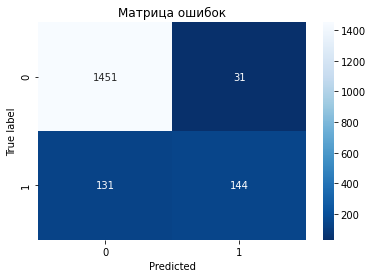

In [40]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues_r")
plt.title("Матрица ошибок")
plt.ylabel("True label")
plt.xlabel("Predicted") 
plt.show()

- `False Positive (FP = 31)` - клиенту ошибочно предсказали отток (на самом деле он остался).
- `False Negative (FN = 131)` - клиент ушел, но модель этого не предсказала.

Для оттока клиентов обычно критичнее **FN**, потому что:
- Потеря клиента = прямая упущенная выгода;
- Ложные срабатывания (FP) менее вредны, чем пропущенные ушедшие клиенты.

`ROC-кривая` - отображает зависимость True Positive Rate (TPR) от False Positive Rate (FPR). `AUC` является хорошей метрикой для оценки качества модели: чем ближе к 1, тем лучше модель разделяет классы.

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> нужно построить ROC-кривую</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 

Построил ROC-кривую
    
</div>

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


AUC: 0.89


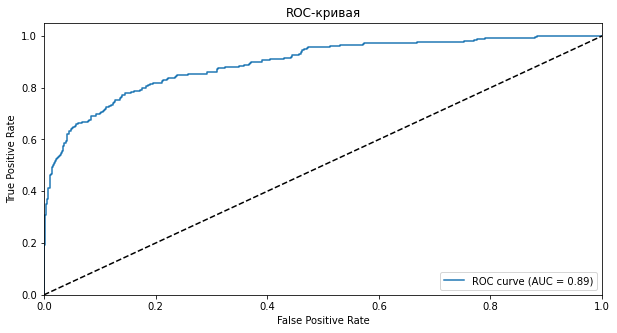

In [43]:
y_scores = searcher.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=searcher.classes_[1])

auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.2f}")

# Строим ROC-кривую
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Анализ важности признаков

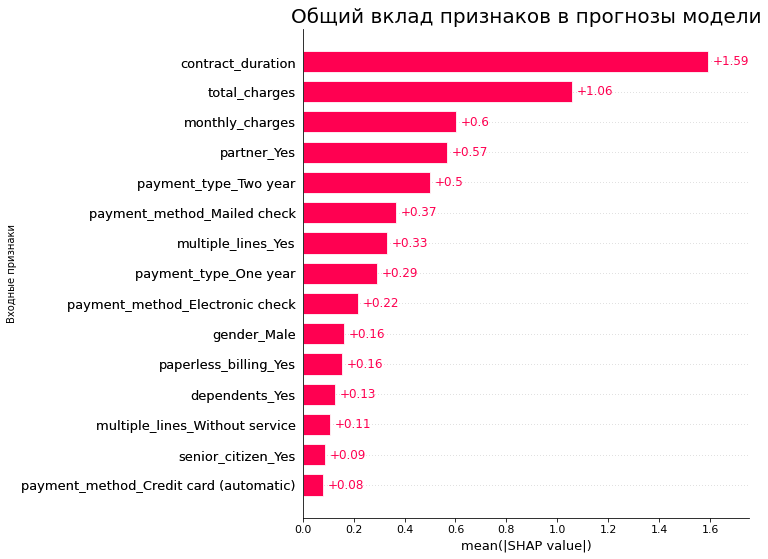

In [45]:
feature_names = preprocessor.get_feature_names_out()

X_train_encoded = preprocessor.transform(X_train)

explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_encoded)[:,:,0]

shap_values.feature_names = feature_names

fig, ax = plt.gcf(), plt.gca()
ax.set_title("Общий вклад признаков в прогнозы модели", fontdict={"size": 20})
ax.set_ylabel("Входные признаки")
shap.plots.bar(
    shap_values=shap_values,
    max_display=50,
)

Признаки сильнее всего влияют на целевой:
- `contract_duration` (1.59) - Длительность контрактов;
- `total_charges` (1.06) - Общие расходы абонента;
- `monthly_charges` (0.6) - Расходы за месяц;
- `partner_Yes` (0.57) - Есть ли у абонента супруг или супруга: Да;
- `payment_type_Two year` (0.5) - Тип оплаты: раз в два года;
- `payment_method_Mailed check` (0.37) - Тип платежа: письмо на почту;
- `multiple_lines_Yes` (0.33) - Подключение телефона к нескольким линиям одновременно: Да.

Проведем дополнительное исследование важных признаков.

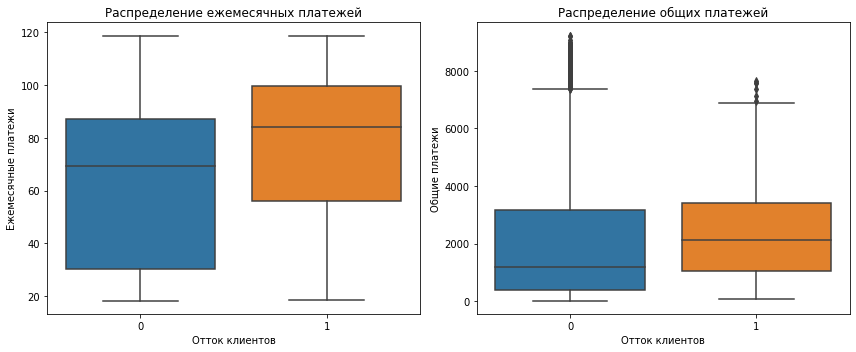

[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] Unknown parameter: featur

In [47]:
# График распределения платежей
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(
    x="target_feature", 
    y="monthly_charges", 
    data=source_df,
)
plt.title("Распределение ежемесячных платежей")
plt.xlabel("Отток клиентов")
plt.ylabel("Ежемесячные платежи")

plt.subplot(1, 2, 2)
sns.boxplot(
    x="target_feature", 
    y="total_charges", 
    data=source_df[source_df["total_charges"].notna()],
)
plt.title("Распределение общих платежей")
plt.xlabel("Отток клиентов")
plt.ylabel("Общие платежи")
plt.tight_layout()
plt.show()

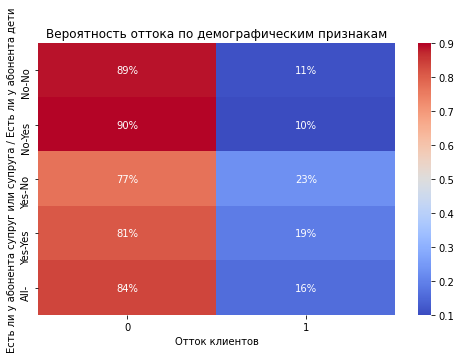

In [48]:
# Heatmap влияния партнера и иждивенцев
demo_analysis: pd.DataFrame = pd.crosstab(
    index=[source_df["partner"], source_df["dependents"]],
    columns=source_df["target_feature"],
    margins=True,
    normalize="index"
).round(2)

plt.figure(figsize=(8, 5))
sns.heatmap(demo_analysis, annot=True, fmt=".0%", cmap="coolwarm")
plt.title("Вероятность оттока по демографическим признакам")
plt.xlabel("Отток клиентов")
plt.ylabel("Есть ли у абонента супруг или супруга / Есть ли у абонента дети")
plt.show()

На графике видно, что наличие детей и наличие супруга/супруги, влияет на целевой признак.

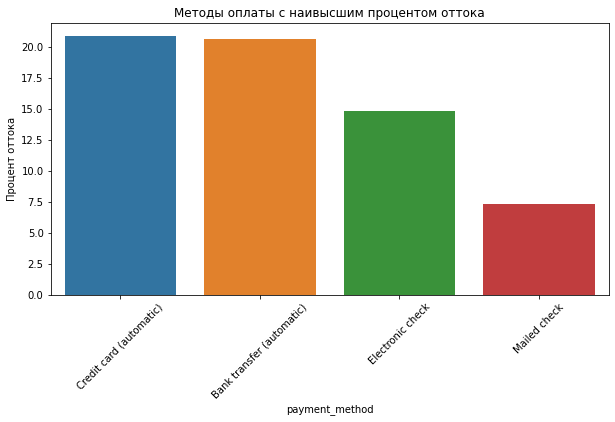

In [49]:
# Топ-5 методов оплаты с наивысшим оттоком
payment_method_analysis = source_df.groupby("payment_method").agg(
    total_clients=("target_feature", "count"),
    churn_rate=("target_feature", lambda x: round(x.mean() * 100, 1)),
    avg_monthly_payment=("monthly_charges", "mean")
).sort_values("churn_rate", ascending=False)

top_payment_methods = payment_method_analysis.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_payment_methods.index, y="churn_rate", data=top_payment_methods)
plt.title("Методы оплаты с наивысшим процентом оттока")
plt.ylabel("Процент оттока")
plt.xticks(rotation=45)
plt.show()

Наивысший метод оттока наблюдаем среди абонентов расплачивающихся кредитными картами.

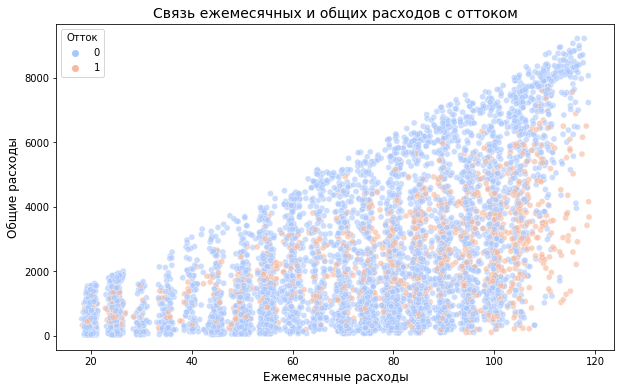

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="monthly_charges", 
    y="total_charges", 
    hue="target_feature", 
    data=source_df, 
    alpha=0.6, 
    palette="coolwarm"
)
plt.title("Связь ежемесячных и общих расходов с оттоком", fontsize=14)
plt.xlabel("Ежемесячные расходы", fontsize=12)
plt.ylabel("Общие расходы", fontsize=12)
plt.legend(title='Отток')
plt.show()

Общие расходы и ежемесячные имеют линейную зависимость.

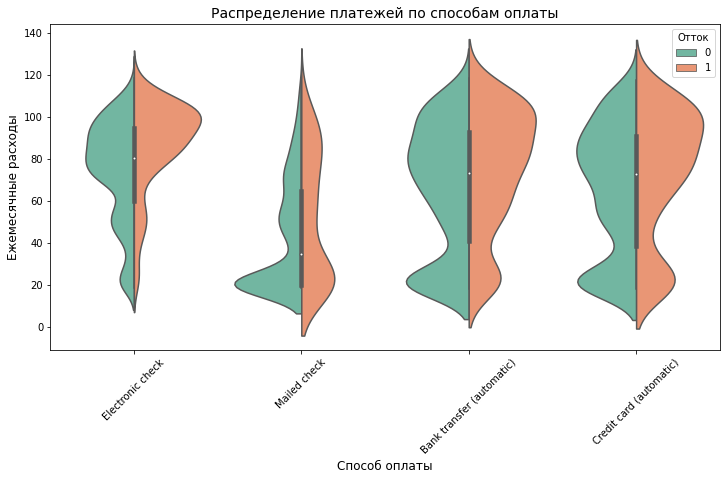

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="payment_method", 
    y="monthly_charges", 
    hue="target_feature",
    data=source_df, split=True, palette="Set2",
)
plt.title("Распределение платежей по способам оплаты", fontsize=14)
plt.xlabel("Способ оплаты", fontsize=12)
plt.ylabel("Ежемесячные расходы", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Отток")
plt.show()

- Клиенты, которые ушли, чаще имеют более низкие расходы, особенно при использовании электронных и почтовых чеков;
- Автоматические способы оплаты (банк и кредитная карта) показывают более стабильное распределение, но у ушедших клиентов расходы немного выше.

## Выводы и рекомендации

Модель `LGBMClassifier` с подобранными гиперпараметрами показала отличное качество прогнозирования оттока клиентов с `ROC-AUC` ~ 0.87 на тестовой выборке.

Наиболее важными признаками для прогнозирования оттока оказались:
- `contract_duration` (1.59) - Длительность контрактов;
- `total_charges` (1.06) - Общие расходы абонента;
- `monthly_charges` (0.6) - Расходы за месяц;
- `partner_Yes` (0.57) - Есть ли у абонента супруг или супруга: Да;
- `payment_type_Two year` (0.5) - Тип оплаты: раз в два года;
- `payment_method_Mailed check` (0.37) - Тип платежа: письмо на почту;
- `multiple_lines_Yes` (0.33) - Подключение телефона к нескольким линиям одновременно: Да.

Основные факторы, влияющие на отток:
- Высокие `contract_duration` и `total_charges` — клиенты с дорогими тарифами чаще уходят;
- Способ оплаты `Mailed check` связан с повышенным оттоком (возможно, из-за неудобства или отсутствия автоплатежей).

Рекомендации для бизнеса:
- Разработать специальные предложения для клиентов с высокими `monthly_charges`:
- Персональные скидки при долгосрочной подписке;
- Бонусные услуги (бесплатное облако или антивирус);
- Усилить техническую поддержку:
    -Ввести чат-бота для быстрого решения простых проблем;
    - Персонального менеджера для VIP-клиентов.
- Внедрить систему раннего предупреждения:
    - Мониторинг клиентов с высоким риском оттока;
    - Автоматические предложения персональных промокодов.

Дальнейшие улучшения модели:
- Сбор дополнительных данных:
    - Частота обращений в поддержку;
    - История изменений тарифов;
    - Данные об использовании услуг
- Разработка системы мониторинга:
    - Регулярное обновление модели;-
    - A/B тестирование мер по удержанию клиентов/

Модель успешно решает поставленную задачу прогнозирования оттока клиентов и может быть использована для разработки стратегии их удержания.

<div class="alert alert-success">
<b>👍 Успех:</b> Молодец, финальный проект завершен! Сама работа получилась хорошей и структурированной, были предобработаны и проанализированы данные, выбран целевой признак, рассчеты подкреплены визуализацией, это очень важная часть работы, которая облегчает анализ и позволяет полнее представлять происходящее в данных. Построено и обучено несколько моделей, все они оценены и выбрана лучшая. Цель работы достигнута, получена модель хорошо предсказывающая уход клиентов. Не забывай о том, что все пункты очень важны и каждому стоит уделять максимум внимания. <p>
С опытом становится значительно легче, но опыт это не только повторение однажды изученного, но и постоянное развитие, тем более, что ты выбрал очень динамично развивающуюся область. <p>
В будущей профессии тебе точно пригодиться умение системно подходить к решению аналитических задач, здесь рекомендую изучить ТРИЗ и системный анализ, из литературы можно почитать Теоретический минимум по Big Data — Су Кеннет и Ын Анналин, Практическая статистика для специалистов Data Science — Брюс П. и Брюс Э., Real-World Machine Learning — Henric Brink, Joseph Мark, W. Richards Fetherolf, Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow — Жерон Орельен.<p>
Есть интересные сообщества (например https://vk.com/mashinnoe_obuchenie_ai_big_data) и конечно же https://habr.com/ru/all/<p>

Дополнительно предлагаю посмотреть:
- Книга от ШАД: https://academy.yandex.ru/handbook/ml

- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/

 Удачи тебе и профессионального роста!
</div>